# IV - Transferencia de Aprendizaje (b)

## Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras.models import load_model
from keras.applications.resnet import ResNet50, preprocess_input
from keras.models import Model, Sequential
from keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.datasets import cifar100

2022-10-11 17:03:20.241363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-11 17:03:20.349410: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-11 17:03:20.353942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-11 17:03:20.353957: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
n_classes = np.max(np.unique(y_train)) + 1

In [3]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [4]:
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding

## Modelo

In [5]:
# ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

2022-10-11 17:03:28.988244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-11 17:03:28.988270: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-11 17:03:28.988291: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (laptop): /proc/driver/nvidia/version does not exist
2022-10-11 17:03:28.988453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model = Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(UpSampling2D())
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(n_classes, activation='softmax'))

In [18]:
for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

## Cargar pesos del modelo y hacer predicciones

In [24]:
# Create a new model instance
model.load_weights('ResNet50_cifar100.h5', by_name=True, skip_mismatch=True)
y_pred = model.predict(x_test, verbose=1)

313/313 [==============================] - 936s 3s/step


## Conversion a categorias numericas y matriz de confusión

In [35]:
y_true = np.argmax(y_test, axis=1) 
y_model = np.argmax(y_pred, axis=1)
CM = confusion_matrix(y_true, y_model)

## Nombres de las categorias y grafico de la matriz

In [36]:
str_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
              'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
              'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
              'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
              'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
              'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
              'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
              'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
              'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
              'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
              'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [42]:
str_labels[y_pred[3].argmax()]

'bee'

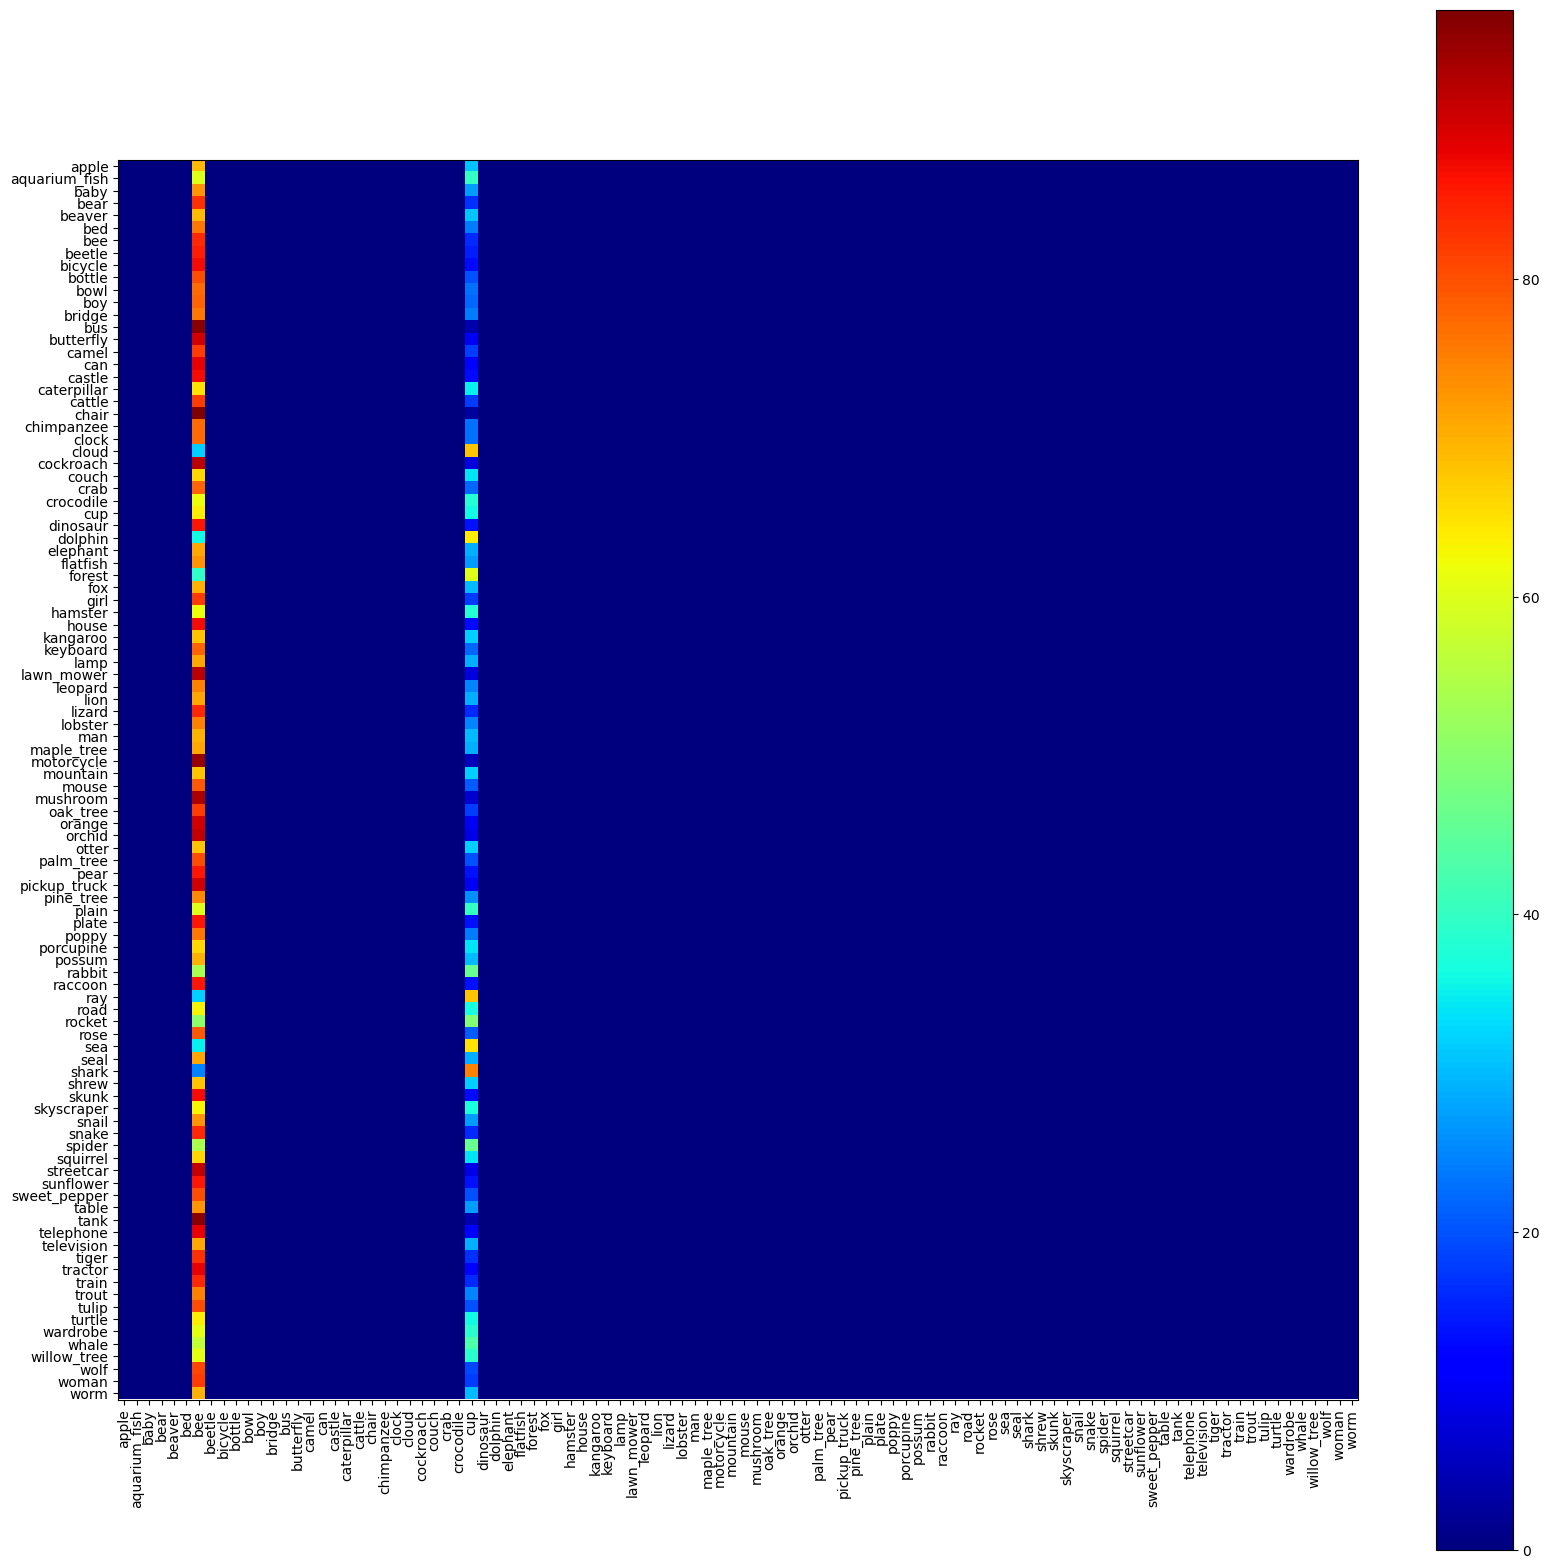

In [37]:
f = plt.figure(figsize=(20,20))
plt.imshow(CM, cmap='jet')
plt.xticks(np.arange(100), str_labels,rotation=90)  # Set text labels and properties.
plt.yticks(np.arange(100), str_labels,rotation=0)  # Set text labels and properties.
plt.colorbar()
plt.show()